In [2]:
from chain import approx_hmc
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
d1 = approx_hmc(mu=0.4, sigma=1, a=4, z=1.5, dt=0.2, Nx=5)
d1.ExitProb_dp1(1, 0)

mu: 0.400
sigma: 1.000
a: 4.000
z: 1.500
dt: 0.20000
dx: 0.80000
Nx: 5
shape of P: (7, 7)
p+, p0, p-: 0.21125, 0.67750, 0.11125


0.01697179953579101

#### Test 1: Coarse grid, check if the code gives the correct full distribution

In [2]:
chain1 = approx_hmc(mu=0.2, sigma=1, a=4, z=2, dt=0.01, Nx=30)

mu: 0.200
sigma: 1.000
a: 4.000
z: 2.000
dt: 0.01000
dx: 0.13333
Nx: 30
shape of P: (32, 32)
p+, p0, p-: 0.28886, 0.43727, 0.27386


In [3]:
T = 1
dist1 = chain1.ExitDist(T)
dist2 = [chain1.ExitProb_dp1(T, i*chain1.dx) for i in range(chain1.Nx+1)]
dist3 = [chain1.ExitProb_dp2(T, i*chain1.dx) for i in range(chain1.Nx+1)]
dist4 = [chain1.ExitProb_logdp1(T, i*chain1.dx) for i in range(chain1.Nx+1)]
dist5 = [chain1.ExitProb_logdp2(T, i*chain1.dx) for i in range(chain1.Nx+1)]
print(*dist1[:5])
print(*dist2[:5])
print(*dist3[:5])
print(*dist4[:5])
print(*dist5[:5])

/gpfs/home/sliu167/WorkSpace/ddm/backup/chain.py:107: RuntimeWarning: divide by zero encountered in log
  logP = np.log(self.AdjMat.todense())
/gpfs/home/sliu167/WorkSpace/ddm/backup/chain.py:112: RuntimeWarning: divide by zero encountered in log
  logprob = logdotexp(np.log(self.init_dist).reshape(1, -1), logtable[:, [0]])


0.0007116247159704107 0.002610677139959567 0.005406779536747215 0.008435655940638128 0.011734434599166434
0.0007116247159704108 0.002610677139959567 0.0054067795367472166 0.00843565594063813 0.011734434599166435
0.0007116247159704108 0.002610677139959567 0.0054067795367472166 0.00843565594063813 0.011734434599166435
0.0007116247159704191 0.002610677139959612 0.005406779536747302 0.008435655940638245 0.01173443459916661
0.0007116247159704112 0.0026106771399595713 0.005406779536747218 0.008435655940638127 0.011734434599166437


#### Test 2: Dense grid, compare running time of exit probability

In [4]:
chain2 = approx_hmc(mu=0.2, sigma=1, a=4, z=2, dt=0.001, Nx=80)

mu: 0.200
sigma: 1.000
a: 4.000
z: 2.000
dt: 0.00100
dx: 0.05000
Nx: 80
shape of P: (82, 82)
p+, p0, p-: 0.20201, 0.59998, 0.19801


In [5]:
T = 4
%timeit prob2 = chain2.ExitProb_dp1(T, 4)
%timeit prob3 = chain2.ExitProb_dp2(T, 4)
%timeit prob4 = chain2.ExitProb_logdp1(T, 4)
%timeit prob5 = chain2.ExitProb_logdp2(T, 4)

40.7 ms ± 829 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
571 ms ± 3.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
914 ms ± 6.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
122 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
prob2 = chain2.ExitProb_dp1(T, 4)
prob3 = chain2.ExitProb_dp2(T, 4)
prob4 = chain2.ExitProb_logdp1(T, 4)
prob5 = chain2.ExitProb_logdp2(T, 4)
prob2, prob3, prob4, prob5

(7.873250893361756e-05,
 7.873250893361756e-05,
 7.873250893361584e-05,
 7.87325089336158e-05)

#### Test 3: Compare results as the grid becomes denser, check if it converges to the continuous case

In [7]:
dt = 0.001
chain0 = approx_hmc(mu=0.2, sigma=1, a=4, z=2, dt=dt, Nx=5, verbose=False)
chain1 = approx_hmc(mu=0.2, sigma=1, a=4, z=2, dt=dt, Nx=10, verbose=False)
chain2 = approx_hmc(mu=0.2, sigma=1, a=4, z=2, dt=dt, Nx=20, verbose=False)
chain3 = approx_hmc(mu=0.2, sigma=1, a=4, z=2, dt=dt, Nx=40, verbose=False)
chain4 = approx_hmc(mu=0.2, sigma=1, a=4, z=2, dt=dt, Nx=80, verbose=False)
prob0 = chain0.ExitProb_logdp2(T=5, s=0)
prob1 = chain1.ExitProb_logdp2(T=5, s=0)
prob2 = chain2.ExitProb_logdp2(T=5, s=0)
prob3 = chain3.ExitProb_logdp2(T=5, s=0)
prob4 = chain4.ExitProb_logdp2(T=5, s=0)
print(wfpt(T=5, mu=0.2, a=4, z=2, err=1e-10))
prob0/dt, prob1/dt, prob2/dt, prob3/dt, prob4/dt

0.02547652896815553


(0.02643224301257986,
 0.02539651859230776,
 0.025458311713189366,
 0.025473112226127977,
 0.02547677223099034)

In [8]:
dt = 0.0002
chain0 = approx_hmc(mu=0.2, sigma=1, a=4, z=2, dt=dt, Nx=5, verbose=False)
chain1 = approx_hmc(mu=0.2, sigma=1, a=4, z=2, dt=dt, Nx=10, verbose=False)
chain2 = approx_hmc(mu=0.2, sigma=1, a=4, z=2, dt=dt, Nx=20, verbose=False)
chain3 = approx_hmc(mu=0.2, sigma=1, a=4, z=2, dt=dt, Nx=40, verbose=False)
chain4 = approx_hmc(mu=0.2, sigma=1, a=4, z=2, dt=dt, Nx=80, verbose=False)
chain5 = approx_hmc(mu=0.2, sigma=1, a=4, z=2, dt=dt, Nx=160, verbose=False)
prob0 = chain0.ExitProb_logdp2(T=5, s=0)
prob1 = chain1.ExitProb_logdp2(T=5, s=0)
prob2 = chain2.ExitProb_logdp2(T=5, s=0)
prob3 = chain3.ExitProb_logdp2(T=5, s=0)
prob4 = chain4.ExitProb_logdp2(T=5, s=0)
prob5 = chain5.ExitProb_logdp2(T=5, s=0)
print(wfpt(T=5, mu=0.2, a=4, z=2, err=1e-10))
prob0/dt, prob1/dt, prob2/dt, prob3/dt, prob4/dt, prob5/dt

0.02547652896815553


(0.026431750901944617,
 0.025395291002294176,
 0.02545712908536354,
 0.025471940789884538,
 0.02547560359179506,
 0.025476516789387695)

#### Test 4: Maximum Likelihood Parameter Search
True paramater: $\mu=0.2, z=1.5$.

In [9]:
data = np.load('data.npy')
data.shape

(100, 2)

In [35]:
probs1d = np.loadtxt('results/probs1d.txt')
mu_list = np.arange(-1, 1, 0.01)

idx = np.argmax(probs1d)
mu_list[idx]


0.22000000000000108

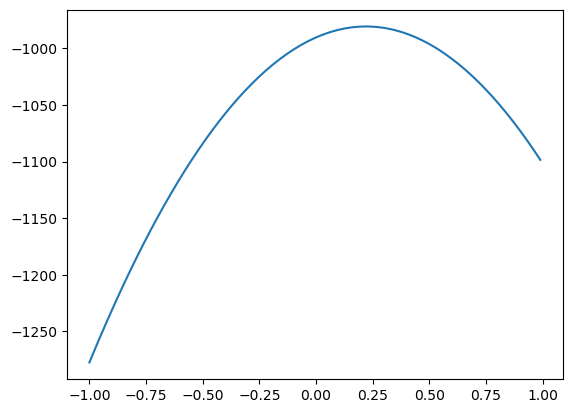

In [36]:
plt.plot(mu_list, probs1d)
plt.show()

In [ ]:
num_ticks = 10
# the index of the position of yticks
yticks = np.linspace(0, len(depth_list) - 1, num_ticks, dtype=np.int)
# the content of labels of these yticks
yticklabels = [depth_list[idx] for idx in yticks

In [34]:
probs2d = np.loadtxt('results/probs2d.txt')
mu_list = np.linspace(-1, 1, 21)
z_list = np.linspace(0.5, 3.5, 21)
idx = np.unravel_index(np.argmax(probs2d), probs2d.shape)

mu_list[idx[0]], z_list[idx[1]]


(0.20000000000000018, 1.4)

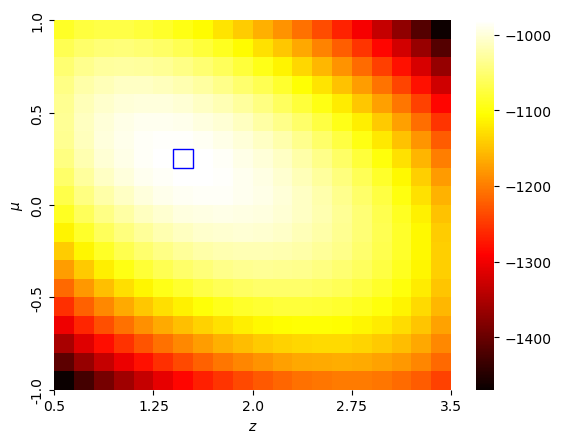

In [33]:
hm = sns.heatmap(probs2d, cmap='hot')

from matplotlib.patches import Rectangle
hm.add_patch(Rectangle((idx[1],idx[0]),1,1, fill=False, edgecolor='blue', lw=1))

hm.invert_yaxis()
hm.set_xlabel('$z$', fontsize=10)
hm.set_ylabel('$\mu$', fontsize=10)
hm.set_xticks(np.arange(0, 21, 5))
hm.set_yticks(np.arange(0, 21, 5))

hm.set_xticklabels(z_list[::5])
hm.set_yticklabels(mu_list[::5])
plt.show()